# Experiments for the marker morphologies

## dataset sorting
### load in the data from kaggle

In [1]:
import kagglehub
#to import the data we will use the open datasets library #we place the link copied from Kaggle into the parameter of the download function
path = kagglehub.dataset_download("dextershepherd/tactip-alternative-morphology-b")
# Download latest version
print("Path to dataset files:", path)

/its/home/drs25/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1


### convert it all

In [ ]:
from convert.convert_data import *
save_path="/its/home/drs25/RoboSkin/Code/NewRigExperiments/optical-tactile-dataset-for-textures/"
final_data,final_labels=load_files_memory_efficient(path+"/")
import numpy as np
np.save(save_path+"X_data_morphoholyB",final_data)
np.save(save_path+"y_data_morphoholyB",final_labels)

{'carpet': 0, 'lacedmatt': 1, 'wool': 2, 'cork': 3, 'felt': 4, 'longcarpet': 5, 'cotton': 6, 'plastic': 7, 'flat': 8, 'foamf': 9, 'foamg': 10, 'bubble': 11, 'foame': 12, 'jeans': 13, 'leather': 14, 'efoam': 15, 'gfoam': 16, 'ffoam': 17} ['/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_EFoam_P80.npy', '/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_Cork_P100.npy', '/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_bubble_P60.npy', '/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_Carpet_P80.npy', '/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_LongCarpet_P80.npy', '/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_flat_P100.npy', '/its/home/drs25/.cache/kaggl

expected shape (200, 20, 355, 328)
issue with /its/home/drs25/.cache/kagglehub/datasets/dextershepherd/tactip-alternative-morphology-b/versions/1/TTB_GFoam_P100.npy
required size: 19096160000
processing... TTB_EFoam_P80.npy
processing... TTB_Cork_P100.npy
processing... TTB_bubble_P60.npy
processing... TTB_Carpet_P80.npy
processing... TTB_LongCarpet_P80.npy
processing... TTB_flat_P100.npy
processing... TTB_bubble_P100.npy
processing... TTB_Jeans_P80.npy
processing... TTB_Cotton_P60.npy
processing... TTB_Jeans_P60.npy
processing... TTB_Felt_P80.npy
processing... TTB_LongCarpet_P100.npy
processing... TTB_Leather_P80.npy
processing... TTB_Felt_P100.npy
processing... TTB_LongCarpet_P60.npy
processing... TTB_Cotton_P100.npy
processing... TTB_Plastic_P80.npy
processing... TTB_bubble_P80.npy
processing... TTB_Jeans_P100.npy
processing... TTB_Cork_P60.npy
processing... TTB_flat_P60.npy
processing... TTB_Cotton_P80.npy
processing... TTB_LacedMatt_P60.npy
processing... TTB_EFoam_P60.npy
processin

### Load

In [1]:
import numpy as np
save_path="/its/home/drs25/RoboSkin/Code/NewRigExperiments/optical-tactile-dataset-for-textures/"

XB=np.load(save_path+"X_data_morphoholyB.npy").reshape((41*200,20,355,328))
yB=np.load(save_path+"y_data_morphoholyB.npy")
print(XB.shape)

(8200, 20, 355, 328)


### Validate 

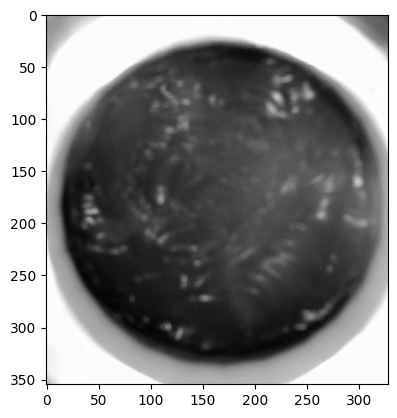

In [6]:
import matplotlib.pyplot as plt

plt.imshow(XB[1000][0],cmap="gray")
plt.show()

## modelling

In [ ]:
import torch
from models import *
from data_loader import * 
from data_format import *
from datapath import *

class data_example(loaded):
    def __init__(self,x,y):
        self.X=x
        self.y=y
data=data_example(XB[:,:7,:,:],yB)
data.applySobel()
print(data.X.shape)
torch.cuda.empty_cache()
train_loader,test_loader=org_data(data,(len(data.X),1,7*355,328))
model,history=run(train_loader,0,4,num_epochs = 100)
print(calc(model,test_loader))
print(calc(model,train_loader))

Using device: cuda
Using device: cuda
(8200, 7, 355, 328)
LOADED DATASET...
Memory left 23.59 GB
(8200, 7, 355, 328) (8200, 1, 2485, 328)
Using 49.8 GB
torch.Size([8200, 1, 2485, 328])
torch.Size([8200, 1])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [164/164], Loss: 0.0000
Epoch [11/100], Step [164/164], Loss: 0.0000
Epoch [21/100], Step [164/164], Loss: 0.0000
Epoch [31/100], Step [164/164], Loss: 0.0000
Epoch [41/100], Step [164/164], Loss: 0.0000
Epoch [51/100], Step [164/164], Loss: 0.0000
Epoch [61/100], Step [164/164], Loss: 0.0000
Epoch [71/100], Step [164/164], Loss: 0.0000
Epoch [81/100], Step [164/164], Loss: 0.0000
Epoch [91/100], Step [164/164], Loss: 0.0000
Finished Training


In [ ]:
XB_accuracy=[]
for i in range(20):
    try:
        del train_loader,test_loader #housekeeping
    except:
        pass
    train_loader,test_loader=org_data(data,(len(data.X),1,7*355,328))
    model,history=run(train_loader,0,4,num_epochs = 100)
    XB_accuracy.append([calc(model,test_loader),calc(model,train_loader)])

XB_accuracy=np.array(XB_accuracy)